In [1]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.interpolation import shift
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
# target 두 개로..
Y_digit = train['digit']
Y_dig_l = train['digit'].astype(str)+train['letter']

In [4]:
# from sklearn.preprocessing import LabelEncoder
# import numpy as np

# code = np.array(Y_dig_l)

# label_encoder = LabelEncoder()
# vec = label_encoder.fit_transform(code)
vec = to_categorical(Y_digit, 10)

In [5]:
train = train.drop(['id','digit','letter'],axis=1)
test = test.drop(['id','letter'],axis=1)

In [6]:
# convert from integers to floats
train = train.astype('float32')
test = test.astype('float32')
# normalize to range 0-1
train /= 255.0
test /= 255.0

In [7]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
print(train.shape)
print(test.shape)

(2048, 28, 28, 1)
(20480, 28, 28, 1)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train,vec, test_size = 0.2, random_state=32)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1638, 28, 28, 1)
(410, 28, 28, 1)
(1638, 10)
(410, 10)


# Data Augmentation

[참고한 링크](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

## Feature Standardization

In [10]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

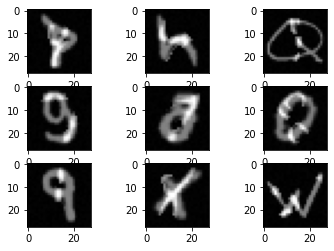

In [11]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## ZCA Whitening
- 그림만 봐도 whitening은 숫자 featurer 뽑아내는데 도움이 될 것 같지 않음.

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


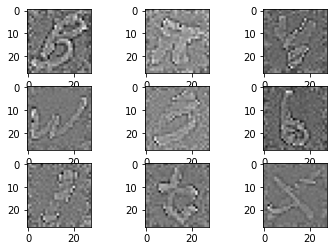

In [12]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Rotation

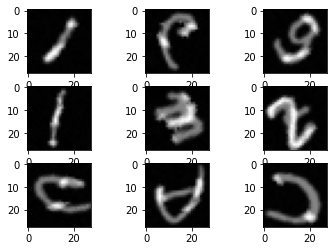

In [13]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Shift

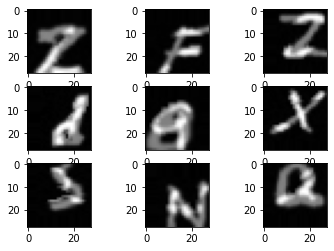

In [14]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Flips
- flip한 이미지를 넣는 것이 도움이 될지는 의문

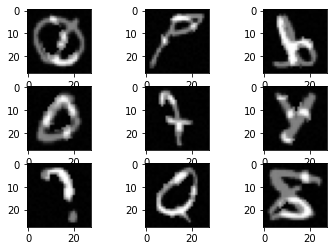

In [15]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Zoom

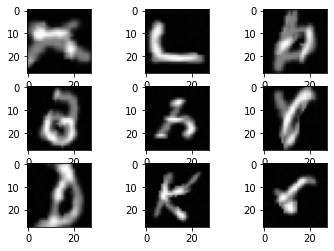

In [16]:
# define data preparation
datagen = ImageDataGenerator(zoom_range=0.3)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## 한꺼번에

In [17]:
datagen = ImageDataGenerator(
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True) # brightness
datagen.fit(X_train)

## Model
- train 데이터가 매우 적기 때문에 overfitting 가능성 때문에 augmentation 적용
- 그럼에도 데이터셋이 부족하므로 모델 layer를 많이 추가하고 dropout 적용

In [18]:
# import tensorflow.keras.applications
# vgg_model = tensorflow.keras.applications.resnet50(input_shape=(28, 28, 1),
#                                                 include_top=False,
#                                                 weights=False)

In [19]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
    
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [21]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=30), 
                    epochs=15, # one forward/backward pass of training data
                    steps_per_epoch=1000, # number of images comprising of one epoch
                    validation_data=(X_valid, y_valid))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1000/1000 [==============================] - 30s 30ms/step - loss: 2.1986 - accuracy: 0.1714 - val_loss: 1.9255 - val_accuracy: 0.3171
Epoch 2/15
1000/1000 [==============================] - 5s 5ms/step - loss: 1.7711 - accuracy: 0.3530 - val_loss: 1.5607 - val_accuracy: 0.4561
Epoch 3/15
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4176 - accuracy: 0.4923 - val_loss: 1.3349 - val_accuracy: 0.5659
Epoch 4/15
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1653 - accuracy: 0.5887 - val_loss: 1.1798 - val_accuracy: 0.6000
Epoch 5/15
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9559 - accuracy: 0.6720 - val_loss: 1.0054 - val_accuracy: 0.6610
Epoch 6/15
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8081 - accuracy: 0.7229 - val_loss: 0.8690 - val_accuracy: 0.6902
Epoch 7/15
1000/1000 [==============================] - 5s

In [22]:
result = model.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
submission = pd.read_csv('../data/submission.csv')
submission['digit'] = result
submission

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [24]:
submission.to_csv('../data/submission_jw2.csv', index=False)

- 유넷: https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a
- 빠름. 
- 단일모델 사용 후 앙상블 (성능 어느정도 나오면)
- augmentation 다른 방법?
- mask r cnn (object 내부 object 인식): 영상처리 기법 중 하나 - 전처리 단계에서.
- msdk r cnn -> Squeeze-and-Excitation Networks
- convolution 사이 사이 batch normalization
- 전처리가 중요. -> 논문 찾아보아야..
- 하얀것만 살려서 돌리기 (convolution/masking, ex. 유방암 예측데이터에서 효율 좋아짐.)
- erosion,dilation
- 어디서 정확도가 떨어지는지 확인. (취약점 확인)
- masking -> erosion/dilation -> 모델 -> 정확도 떨어지는 것 부분 확인 -> 개선
- gaussian blur(중요한 부분만 부각) -> ROI Extraction(중요한 부분만 증폭) -> centered frame(중앙으로 옮김) -> resized and resampled(사이즈 조정)
- spinal net